In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import datasets

In [2]:
pd.options.display.float_format = '{:.1f}'.format
pd.options.display.max_rows = 10

In [3]:
# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

## Load the dataset

`tf.keras` provides a set of convenience functions for loading well-known datasets. Each of these convenience functions does the following:

* Loads both the training set and the test set.
* Separates each set into features and labels.

The relevant convenience function for MNIST is called `mnist.load_data()`:

In [12]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [15]:
x_train.shape

(10000, 28, 28)

In [17]:
# Output example #2917 of the training set.
x_train[2917].shape

(28, 28)

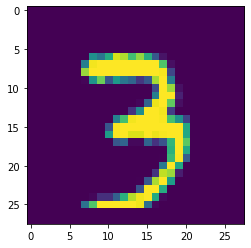

In [18]:
plt.imshow(x_train[2917])

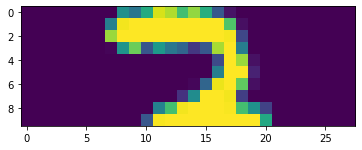

In [27]:
plt.imshow(x_train[2917][6:16])

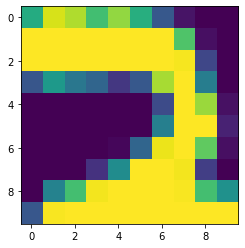

In [29]:
plt.imshow(x_train[2917][6:16,10:20])

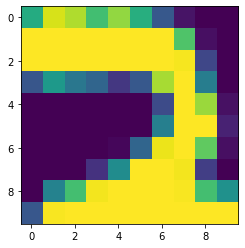

In [30]:
plt.imshow(x_train[2917,6:16,10:20])

In [38]:
x_train[2917,10,16]

58

## Task 1: Normalize feature values

Complete the following code cell to map each feature value from its current representation (an integer between 0 and 255) to a floating-point value between 0 and 1.0. Store the floating-point values in `x_train_normalized` and `x_test_normalized`.

In [70]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0
print(x_train_normalized[2917,10,16])

0.22745098039215686


In [41]:
58/255

0.22745098039215686

## Define a plotting function

The following function plots an accuracy curve:

In [52]:
def plot_curve(epochs, hist, list_of_metrics):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    
    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)
        
    plt.legend()
    
print('Loaded the plot_curve function.')

Loaded the plot_curve function.


In [74]:
def create_model(my_learning_rate):
    model = tf.keras.models.Sequential()
    
    # The features are stored in a two-dimensional 28X28 array. 
    # Flatten that two-dimensional array into a a one-dimensional 784-element array.
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    
    # Define the first hidden layer.  
    model.add(tf.keras.layers.Dense(units=32, activation='relu'))
    
    # Define a dropout regularization layer
    model.add(tf.keras.layers.Dropout(rate=0.2))
    
    # Define the output layer. The units parameter is set to 10 
    # because the model must choose among 10 possible output values (representing
    # the digits from 0 to 9, inclusive).
    #
    # Don't change this layer.
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
    
    # Construct the layers into a model that TensorFlow can execute.  
    # Notice that the loss function for multi-class classification
    # is different than the loss function for binary classification. 
    model.compile(loss = 'sparse_categorical_crossentropy',
                 #optimizer= 'adam',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                 metrics=['accuracy'])
    
    return model

In [56]:
def train_model(model, train_features, train_label, epochs,
               batch_size=None, validation_split=0.1):
    history = model.fit(x= train_features, y = train_label, epochs=epochs,
                       batch_size=batch_size, shuffle=True,
                       validation_split=validation_split)
    
    # To track the progression of training, gather a snapshot
    # of the model's metrics at each epoch. 
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    
    return epochs, hist, history

Epoch 1/50
12/12 [==============================] - 2s 67ms/step - loss: 1.6577 - accuracy: 0.4739 - val_loss: 0.9405 - val_accuracy: 0.7632
Epoch 2/50
12/12 [==============================] - 0s 34ms/step - loss: 0.8658 - accuracy: 0.7381 - val_loss: 0.5193 - val_accuracy: 0.8711
Epoch 3/50
12/12 [==============================] - 0s 41ms/step - loss: 0.6121 - accuracy: 0.8171 - val_loss: 0.4021 - val_accuracy: 0.8931
Epoch 4/50
12/12 [==============================] - 0s 36ms/step - loss: 0.5059 - accuracy: 0.8520 - val_loss: 0.3447 - val_accuracy: 0.9080
Epoch 5/50
12/12 [==============================] - 0s 34ms/step - loss: 0.4441 - accuracy: 0.8701 - val_loss: 0.3084 - val_accuracy: 0.9153
Epoch 6/50
12/12 [==============================] - 0s 38ms/step - loss: 0.4087 - accuracy: 0.8799 - val_loss: 0.2872 - val_accuracy: 0.9209
Epoch 7/50
12/12 [==============================] - 0s 41ms/step - loss: 0.3805 - accuracy: 0.8889 - val_loss: 0.2695 - val_accuracy: 0.9262
Epoch 8/50
12

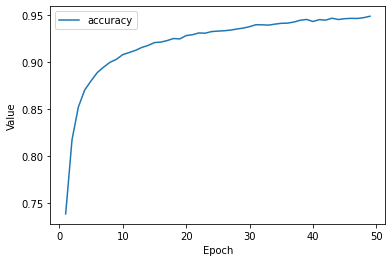

In [72]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist, history = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

In [73]:
# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)


 Evaluate the new model against the test set:
3/3 [==============================] - 0s 11ms/step - loss: 0.1387 - accuracy: 0.9600


[0.13871465623378754, 0.9599999785423279]

## Task 2: Optimize the model

Experiment with the following:

* number of hidden layers 
* number of nodes in each layer
* dropout regularization rate

What trends did you discover?  Can you reach at least 98% accuracy against the test set? 

 It would take much too long to experiment fully with topography and dropout regularization 
 rate. In the real world, you would also experiment with learning rate, batch size, and number of epochs.  Since you only have a few minutes, searching for trends can be helpful.
 
 Here is what we discovered:
  * Adding more nodes (at least until 256 nodes) to the first hidden layer improved accuracy.
  * Adding a second hidden layer generally improved accuracy.
  * When the model contains a lot of nodes, the model overfits unless the dropout rate is at least 0.5. 

 We reached 98% test accuracy with the following configuration:
  * One hidden layer of 256 nodes; no second hidden layer.
  * dropout regularization rate of 0.4

 We reached 98.2% test accuracy with the following configuration:
  * First hidden layer of 256 nodes; second hidden layer of 128 nodes.
  * dropout regularization rate of 0.2

Epoch 1/50
12/12 [==============================] - 1s 68ms/step - loss: 2.0339 - accuracy: 0.3448 - val_loss: 1.6469 - val_accuracy: 0.6022
Epoch 2/50
12/12 [==============================] - 0s 37ms/step - loss: 1.4733 - accuracy: 0.5918 - val_loss: 1.1367 - val_accuracy: 0.7334
Epoch 3/50
12/12 [==============================] - 0s 35ms/step - loss: 1.1090 - accuracy: 0.6893 - val_loss: 0.8314 - val_accuracy: 0.8124
Epoch 4/50
12/12 [==============================] - 0s 37ms/step - loss: 0.8966 - accuracy: 0.7479 - val_loss: 0.6657 - val_accuracy: 0.8512
Epoch 5/50
12/12 [==============================] - 0s 40ms/step - loss: 0.7673 - accuracy: 0.7832 - val_loss: 0.5672 - val_accuracy: 0.8703
Epoch 6/50
12/12 [==============================] - 0s 34ms/step - loss: 0.6822 - accuracy: 0.8086 - val_loss: 0.5016 - val_accuracy: 0.8827
Epoch 7/50
12/12 [==============================] - 0s 37ms/step - loss: 0.6212 - accuracy: 0.8260 - val_loss: 0.4566 - val_accuracy: 0.8891
Epoch 8/50
12

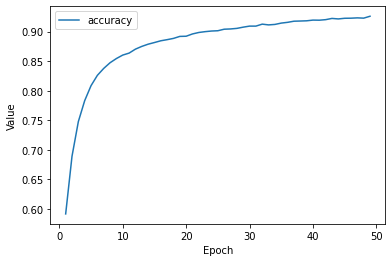

In [75]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist, history = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)